## Matricial design of human eye

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
def SistemaOjo(onda_nm):
    
    h = lambda n,th,R,f: -1.*f*(n-1)*th/(n*R)
    
    foco = lambda n_,R1_,R2_,d_: ( n_*R1_*R2_ )/( n_*(d_+R2_-R1_) - d_ )/(n_-1)
    
    R1 = 7.8
    R2 = 6.7
    R3 = 10.0
    R4 = -6.0
    #cornea,aqueous,lens
    th_c = 0.5
    th_a = 3.0
    th_l = 4.0
    th_v = 16.6
    
    #aire
    n = 1.
    
    if onda_nm == '400':
        n_c = 1.3898
        n_a = 1.3515
        n_l = 1.4387
        n_v = 1.3494
        
    elif onda_nm == '550':
        n_c = 1.3774 
        n_a = 1.3388
        n_l = 1.4218
        n_v = 1.3374
        
    elif onda_nm == '700':
        n_c = 1.3730
        n_a = 1.3343
        n_l = 1.4162
        n_v = 1.3331
    
    f_c = foco(n_c,R1,R2,th_c)
    h1_c = h(n_c,th_c,R2,f_c)
    h2_c = h(n_c,th_c,R1,f_c)
    
    f_a = foco(n_a,R2,R3,th_a)    
    h1_a = h(n_a,th_a,R3,f_a)
    h2_a = h(n_a,th_a,R2,f_a)
    
    f_l = foco(n_l,R3,R4,th_l)
    h1_l = h(n_l,th_l,R4,f_l)
    h2_l = h(n_l,th_l,R3,f_l)
    
    # MATRICES
    
    #matriz distancia infinito-cornea
    ME = np.array([[1,6000/n],[0,1]])
    
    #matriz 1° superficia cornea
    M2 = np.array([[1,0],[(1-n_c)/abs(R1),1]])
    
    #matriz espesor cornea
    M3 = np.array([[1,th_c/(n_c)],[0,1]])
    
    #matriz 2°superficie cornea
    M4 = np.array([[1,0],[(n_c-n_a)/abs(R2),1]])
    
    #matriz aqueous
    MA = np.array([[1,th_a/n_a],[0,1]])
    
    #matriz 1°superficie lens
    M6 = np.array([[1,0],[(n_a-n_l)/abs(R3),1]])
    
    #matriz espesor lens
    M7 = np.array([[1,th_l/(n_l)],[0,1]])
    
    #matriz 2°superficie lens
    M8 = np.array([[1,0],[-1*(n_l-n_v)/abs(R4),1]])
       
    #matriz vitreous
    MV = np.array([[1,th_v/n_v],[0,1]])
    
    #Hallando distancia de formación de imagen
    MT = M8@M7@M6@MA@M4@M3@M2@ME
    B = MT[0][1]
    D = MT[1][1]

    s_i = -1.*(B*n_v)/D
    print("La imagen se forma a %.2f mm de la 2° superficie del cristalino."% s_i)
    
    aumento = 1/D
    
    #Hallando distancia focal del Sistema Optico
    
    SO=M8@M7@M6@MA@M4@M3@M2
    a11=SO[0][0]
    a12=SO[0][1]
    a21=SO[1][0]
    a22=SO[1][1]
    
    fi = -1.*n_v/a21
    print("La distancia focal efectiva imagen es: %.2f mm "% fi)
    V2H2 = n_v*(1-a11)/(a21)
    
    bfl=fi+V2H2
    print("La distancia focal b.f.l es: %.2f mm "% bfl)
    fo = 1./a21

    return bfl,fi,-1*fo

In [12]:
SistemaOjo('400')

La imagen se forma a 15.87 mm de la 2° superficie del cristalino.
La distancia focal efectiva imagen es: 21.40 mm 
La distancia focal b.f.l es: 15.81 mm 


(15.808967631799527, 21.398325885806752, 15.857659615982476)

In [101]:
def R1_SistemaOjo(onda_nm):
    
    h = lambda n,th,R,f: -1.*f*(n-1)*th/(n*R)
    foco = lambda n_,R1_,R2_,d_: ( n_*R1_*R2_ )/( n_*(d_+R2_-R1_) - d_ )/(n_-1)
    
    R1 = np.linspace(6.8,8.8,100)
    R2 = 6.7
    R3 = 10.0
    R4 = -6.0
    #corena,aqueous,lens
    th_c = 0.5
    th_a = 3.0
    th_l = 4.0
    th_v = 16.6
    
    #aire
    n = 1.
    
    if onda_nm == '400':
        n_c = 1.3898
        n_a = 1.3515
        n_l = 1.4387
        n_v = 1.3494
        
    elif onda_nm == '550':
        n_c = 1.3774 
        n_a = 1.3388
        n_l = 1.4218
        n_v = 1.3374
        
    elif onda_nm == '700':
        n_c = 1.3730
        n_a = 1.3343
        n_l = 1.4162
        n_v = 1.3331
    
    f_c = foco(n_c,R1,R2,th_c)
    h1_c = h(n_c,th_c,R2,f_c)
    h2_c = h(n_c,th_c,R1,f_c)
    
    f_a = foco(n_a,R2,R3,th_a)    
    h1_a = h(n_a,th_a,R3,f_a)
    h2_a = h(n_a,th_a,R2,f_a)
    
    f_l = foco(n_l,R3,R4,th_l)
    h1_l = h(n_l,th_l,R4,f_l)
    h2_l = h(n_l,th_l,R3,f_l)
    
    # MATRICES
    
    #matriz distancia infinito-cornea
    ME = np.array([[1,6000/n],[0,1]])
    
    #matriz 1° superficia cornea
    M2 = np.empty((len(R1), 2, 2))

    for i, R1 in enumerate(R1):
        M2[i] = np.array([[1, 0], [(1 - n_c) / np.abs(R1), 1]])
    
    #matriz espesor cornea
    M3 = np.array([[1,th_c/(n_c)],[0,1]])
    
    #matriz 2°superficie cornea
    M4 = np.array([[1,0],[(n_c-n_a)/abs(R2),1]])
    
    #matriz aqueous
    MA = np.array([[1,th_a/n_a],[0,1]])
    
    #matriz 1°superficie lens
    M6 = np.array([[1,0],[(n_a-n_l)/abs(R3),1]])
    
    #matriz espesor lens
    M7 = np.array([[1,th_l/(n_l)],[0,1]])
    
    #matriz 2°superficie lens
    M8 = np.array([[1,0],[-1*(n_l-n_v)/abs(R4),1]])
       
    #matriz vitreous
    MV = np.array([[1,th_v/n_v],[0,1]])
    
    #Hallando distancia de formación de imagen
    MT = M8@M7@M6@MA@M4@M3@M2@ME
    B = MT[:,0,1]
    D = MT[:,1,1]

    s_i = -1.*(B*n_v)/D
    s_i = s_i - 16.6
    
    aumento = 1/D
    
    #Hallando distancia focal del Sistema Optico
    
    SO=M8@M7@M6@MA@M4@M3@M2
    a11=SO[:,0,0]
    a12=SO[:,0,1]
    a21=SO[:,1,0]
    a22=SO[:,1,1]
    
    fi = -1.*n_v/a21
    V2H2 = n_v*(1-a11)/(a21)
    
    bfl=fi+V2H2
    
    fo = 1./a21
    V1H1 = (a22-1)/a21
    ffl = abs(fo)-V1H1

    return (bfl-16.6),-1*fo,s_i,ffl

In [102]:
bfl_400,fo_400,s_i400,ffl_400 = R1_SistemaOjo('400')
bfl_550,fo_550,s_i550,ffl_550 = R1_SistemaOjo('550')
bfl_700,fo_700,s_i700,ffl_700 = R1_SistemaOjo('700')
R1 = np.linspace(6.75,8.75,100)

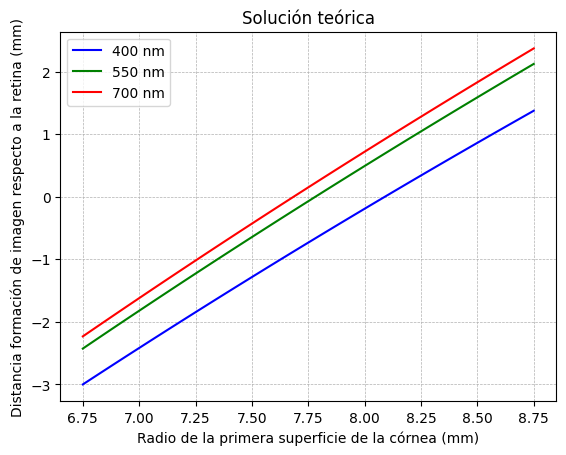

In [15]:
plt.figure()
plt.plot(R1,s_i400,'b-',label='400 nm')
plt.plot(R1,s_i550,'g-',label='550 nm')
plt.plot(R1,s_i700,'r-',label='700 nm')
plt.legend()
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.title("Solución teórica")
plt.xlabel("Radio de la primera superficie de la córnea (mm)")
plt.ylabel("Distancia formación de imagen respecto a la retina (mm)")
plt.savefig(os.path.join('DistanciaImagen.jpg'))
plt.show()

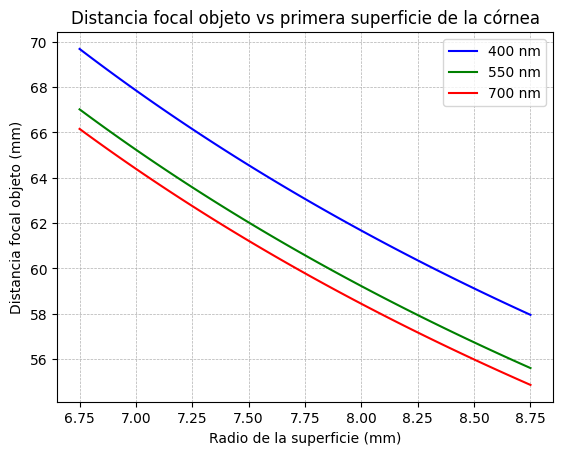

In [105]:
plt.figure()
plt.plot(R1,1000/fo_400,'b-',label='400 nm')
plt.plot(R1,1000/fo_550,'g-',label='550 nm')
plt.plot(R1,1000/fo_700,'r-',label='700 nm')
plt.legend()
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.title("Distancia focal objeto vs primera superficie de la córnea")
plt.xlabel("Radio de la superficie (mm)")
plt.ylabel("Distancia focal objeto (mm)")
plt.savefig(os.path.join('PotenciaFocalObjeto.jpg'))
plt.show()

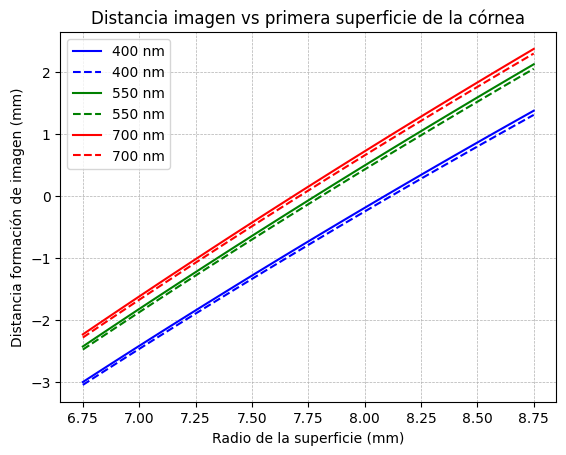

In [17]:
plt.figure()
plt.plot(R1,s_i400,'b-',label='400 nm')
plt.plot(R1,bfl_400,'b--',label='400 nm')

plt.plot(R1,s_i550,'g-',label='550 nm')
plt.plot(R1,bfl_550,'g--',label='550 nm')

plt.plot(R1,s_i700,'r-',label='700 nm')
plt.plot(R1,bfl_700,'r--',label='700 nm')

plt.legend()
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.title("Distancia imagen vs primera superficie de la córnea")
plt.xlabel("Radio de la superficie (mm)")
plt.ylabel("Distancia formación de imagen (mm)")
plt.savefig(os.path.join('DistanciaImagenBFL.jpg'))
plt.show()

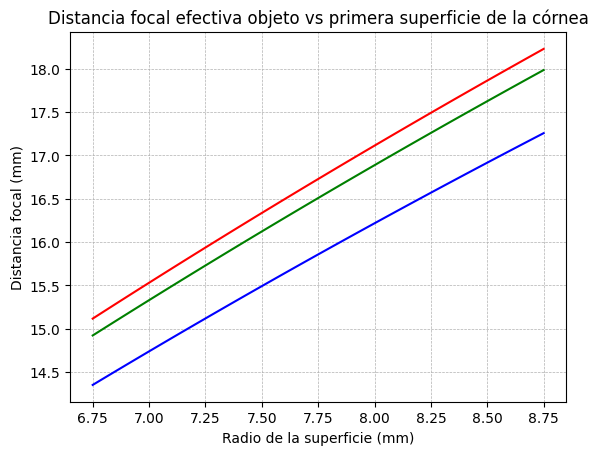

In [18]:
plt.figure()
plt.plot(R1,-1*fo_400,'b-',R1,-1*fo_550,'g-',R1,-1*fo_700,'r-')
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.title("Distancia focal efectiva objeto vs primera superficie de la córnea")
plt.xlabel("Radio de la superficie (mm)")
plt.ylabel("Distancia focal (mm)")
plt.show()

### Definiendo el indice de refraccion variable

In [19]:
def foco(n,R1,R2,d):
    f_ = ( n*R1*R2 )/( n*(d+R2-R1) - d )
    f = f_/(n-1)
    return f

In [20]:
def lens(onda_nm):
    
    R1 = 10.0
    R2 = -6.0
    th = 4.0
    n = 1.
    
    if onda_nm == '400':
        n = 1.4387
    elif onda_nm == '550':
        n = 1.4218
    elif onda_nm == '700':
        n = 1.4162
        
    focal = foco(n,R1,R2,th)
    
    h1 = -1.*focal*(n-1)*th/(n*R2)
    
    h2 = -1.*focal*(n-1)*th/(n*R1)
    
    return focal,h1,h2,n,R1,R2,th

In [21]:
f_l,h1_l,h2_l,n_l,R1_l,R2_l,th_l = lens('550')
print("Longitud focal del cristalino (mm): ", f_l)

Longitud focal del cristalino (mm):  9.602666021031798


### Hallando la constante de la función del indice de refracción

In [22]:
from scipy.optimize import fsolve

def ecuacion(C):
    n_max = 1.406
    n_min = 1.386
    r = 4.5
    return n_max - (r**2)*C - n_min 

solution = fsolve(ecuacion, 0.00095) 
solution[0]

0.0009876543209876582

In [40]:
#400
max_400 = 1.42056013740234
min_400 = 1.40035273095703
#550
max_550 = 1.40626229622756
min_550 = 1.38625827171630
#700
max_700 = 1.40051374779896
min_700 = 1.38059149493408

solC = lambda nmax,nmin: (nmax-nmin)/(4.5**2)

C_400 = solC(max_400,min_400)
C_550 = solC(max_550,min_550)
C_700 = solC(max_700,min_700)

C = [C_400,C_550,C_700]
C

[0.0009978966145832069, 0.0009878530622844466, 0.0009838149562903663]

In [24]:
1/ ( 2*f_l*4*55 ) # valor cercano

0.00023667669663294925

In [17]:
def n_y(y,onda):
    
    if onda == '400':
        n_max = 1.42056013740234
        n_min = 1.40035273095703
        C = 0.0009978966145832069
    elif onda == '550':
        n_max = 1.40626229622756
        n_min = 1.38625827171630
        C = 0.0009878530622844466
    elif onda == '700':
        n_max = 1.40051374779896
        n_min = 1.38059149493408
        C = 0.0009838149562903663      

    n = n_max - C*( y**2 )
    return n

In [115]:
y = np.linspace(-4.5,4.5,500)
fy_400 = n_y(y,'400')
fy_550 = n_y(y,'550')
fy_700 = n_y(y,'700')

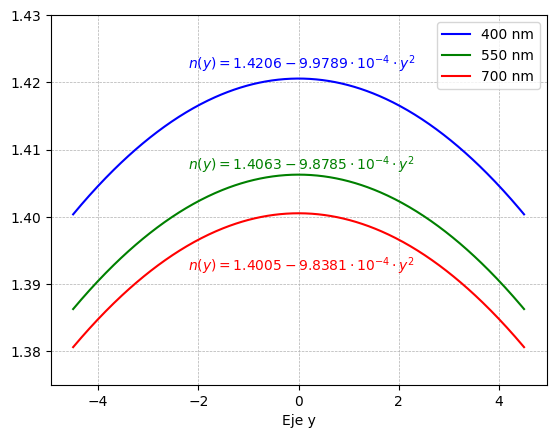

In [152]:
plt.plot(y,fy_400,'b-',label='400 nm')
plt.plot(y,fy_550,'g-',label='550 nm')
plt.plot(y,fy_700,'r-',label='700 nm')

plt.legend()
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.ylim([1.375, 1.43])

plt.text(-2.2, 1.422, r'$n(y) = 1.4206 - 9.9789\cdot 10^{-4} \cdot y^2$', color='blue')
plt.text(-2.2, 1.407, r'$n(y) = 1.4063 - 9.8785\cdot 10^{-4} \cdot y^2$', color='green')
plt.text(-2.2, 1.392, r'$n(y) = 1.4005 - 9.8381\cdot 10^{-4} \cdot y^2$', color='red')

plt.xlabel('Eje y')
plt.savefig(os.path.join("FuncionRefraccion.jpg"))

plt.show()

## Curvatura en el espacio

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def curv(onda):
# Definir la posición inicial y el ángulo de la luz
       
    listZ = np.array([0])
    
    if onda=='400':
        y1 = np.arange(4.5, 0, -0.01)
        th_0 = np.pi*84/180
        n_0 = n_y(y1[0],'400')
        
        for i in range(len(y1)-1):
    
            sen_th = (n_0*np.sin(th_0))/n_y(y1[i+1],'400')
            th = np.arcsin(sen_th)
            z = np.tan(th)*0.01
    
            listZ = np.append(listZ,z)
    
            n_0 = n_y(y1[i+1],'400')
            th_0 = th  
    
        Z = np.cumsum(listZ)
        return (Z,y1)
        
    if onda=='550':
        y2 = np.arange(4.5, 0, -0.01)
        n_0 = n_y(y2[0],'550')
        th_0 = np.pi*86/180       
 
        for i in range(len(y2)-1):
    
            sen_th = (n_0*np.sin(th_0))/n_y(y2[i+1],'550')
            th = np.arcsin(sen_th)
            z = np.tan(th)*0.01
    
            listZ = np.append(listZ,z)
    
            n_0 = n_y(y2[i+1],'550')
            th_0 = th  
    
        Z = np.cumsum(listZ)
        return (Z,y2)
        
    if onda=='700':
        y3 = np.arange(4.5, 0, -0.01)
        n_0 = n_y(y3[0],'700')
        th_0 = np.pi*88/180
        
 
        for i in range(len(y3)-1):
    
            sen_th = (n_0*np.sin(th_0))/n_y(y3[i+1],'700')
            th = np.arcsin(sen_th)
            z = np.tan(th)*0.01
    
            listZ = np.append(listZ,z)
    
            n_0 = n_y(y3[i+1],'700')
            th_0 = th  
    
        Z = np.cumsum(listZ)
        return (Z,y3)
    
    

In [91]:
z_4,y1=curv('400')
z_5,y2=curv('550')
z_7,y3=curv('700')

In [92]:
len(z_5),len(y2)

(450, 450)

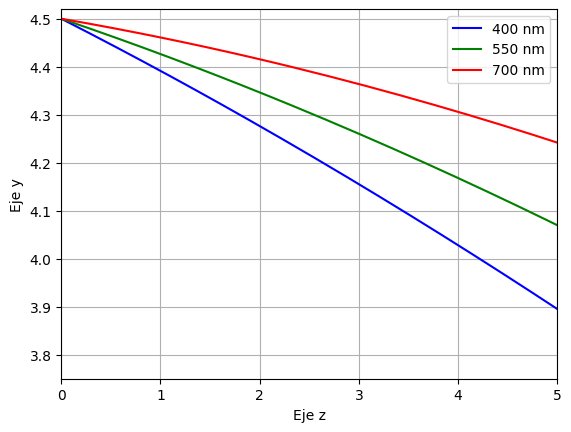

In [99]:
# Graficar la trayectoria de la luz
plt.plot(z_4, y1,'b-',label='400 nm')
plt.plot(z_5, y2,'g-',label='550 nm')
plt.plot(z_7, y3,'r-',label='700 nm')
plt.grid()
plt.legend()
plt.xlabel('Eje z')
plt.ylabel('Eje y')
plt.xlim([0,5])
plt.ylim([3.75,4.52])
#plt.title('Trayectoria de la luz a través de un medio con índice de refracción variable')

plt.savefig(os.path.join("curvaturaGradiente"))
plt.show()

-----------------------------------------------------------------

In [113]:
def n_r(x,y,onda):
    
    if onda == '400':
        n_max = 1.42056013740234
        n_min = 1.40035273095703
        C = 0.0009978966145832069
    elif onda == '550':
        n_max = 1.40626229622756
        n_min = 1.38625827171630
        C = 0.0009878530622844466
    elif onda == '700':
        n_max = 1.40051374779896
        n_min = 1.38059149493408
        C = 0.0009838149562903663      
        
    r = np.sqrt(x**2 + y**2)
    #C = 1/ ( 2*f_l*4*55 )
    n = n_max - C*( r**2 )
    
    filas = n.shape[0]
    columnas = n.shape[1]
    
    for i in range(filas):
        for j in range(columnas):
            if n[i][j] < n_min:
                n[i, j] = None
    return n

In [31]:
x = np.linspace(-4.5,4.5,500)
y = np.linspace(-4.5,4.5,500)

In [32]:
X, Y = np.meshgrid(x, y)

In [38]:
f = n_r(X,Y,'700')
f

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

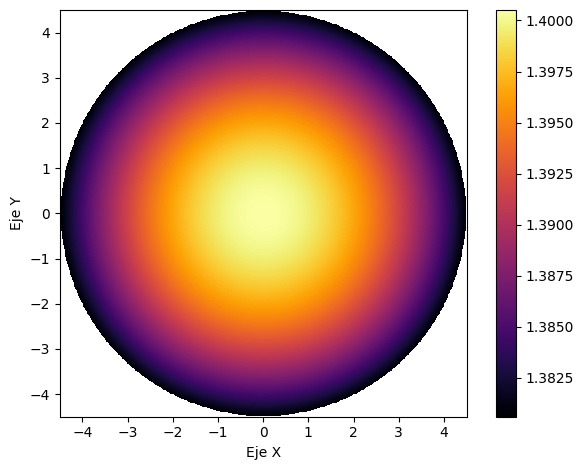

In [39]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Muestra la función en 2D con colores
imagen = ax.imshow(f, extent=[-4.5, 4.5, -4.5, 4.5], origin='lower', cmap='inferno')

# Añade una barra de colores
barra_colores = plt.colorbar(imagen)

# Puedes agregar etiquetas a los ejes según tus necesidades
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Asegúrate de ajustar la disposición de los elementos en la figura para evitar superposiciones
plt.tight_layout()

# Muestra el gráfico
plt.show()

# Guarda la figura en un archivo
ruta_guardado = os.path.join('GraficoColorCristalino_700.jpg')
fig.savefig(ruta_guardado)


In [43]:
f_L = lambda nmax,c: np.sqrt(nmax/(2*c))

[f_L(max_400,C_400),f_L(max_550,C_550),f_L(max_700,C_700)]

[26.679153106981367, 26.679150281177, 26.67914946198995]

In [55]:
L = f_L(max_400,C_400)
th =4

M_lens = np.array([[ np.cos(th/L) , L*np.sin(th/L) ],[ -1*np.sin(th/L)/L ,np.cos(th/L) ]])
M_lens

array([[ 0.98878157,  3.98503087],
       [-0.00559871,  0.98878157]])

In [107]:
def R1_Gradiente(onda_nm):
    
    h = lambda n,th,R,f: -1.*f*(n-1)*th/(n*R)
    foco = lambda n_,R1_,R2_,d_: ( n_*R1_*R2_ )/( n_*(d_+R2_-R1_) - d_ )/(n_-1)
    
    R1 = np.linspace(6.8,8.8,100)
    R2 = 6.7
    R3 = 10.0
    R4 = -6.0
    #corena,aqueous,lens
    th_c = 0.5
    th_a = 3.0
    th_l = 4.0
    th_v = 16.6
    
    #aire
    n = 1.
    f_L = lambda nmax,c: np.sqrt(nmax/(2*c))

    if onda_nm == '400':
        n_c = 1.3898
        n_a = 1.3515
        n_l = 1.4387
        n_v = 1.3494
        n_max = 1.4206
        n_min = 1.4004
        C = 0.00099789
        L = f_L(n_max,C)
        
    elif onda_nm == '550':
        n_c = 1.3774 
        n_a = 1.3388
        n_l = 1.4218
        n_v = 1.3374
        n_max = 1.4063
        n_min = 1.3863
        C = 0.00098785
        L = f_L(n_max,C)       
        
    elif onda_nm == '700':
        n_c = 1.3730
        n_a = 1.3343
        n_l = 1.4162
        n_v = 1.3331
        n_max = 1.40051
        n_min = 1.38059
        C = 0.00098381
        L = f_L(n_max,C)
    
    f_c = foco(n_c,R1,R2,th_c)
    h1_c = h(n_c,th_c,R2,f_c)
    h2_c = h(n_c,th_c,R1,f_c)
    
    f_a = foco(n_a,R2,R3,th_a)    
    h1_a = h(n_a,th_a,R3,f_a)
    h2_a = h(n_a,th_a,R2,f_a)
    
    f_l = foco(n_l,R3,R4,th_l)
    h1_l = h(n_l,th_l,R4,f_l)
    h2_l = h(n_l,th_l,R3,f_l)
    
    # MATRICES
    
    #matriz distancia infinito-cornea
    ME = np.array([[1,6000/n],[0,1]])
    
    #matriz 1° superficia cornea
    M2 = np.empty((len(R1), 2, 2))

    for i, R1 in enumerate(R1):
        M2[i] = np.array([[1, 0], [(1 - n_c) / np.abs(R1), 1]])
    
    #matriz espesor cornea
    M3 = np.array([[1,th_c/(n_c)],[0,1]])
    
    #matriz 2°superficie cornea
    M4 = np.array([[1,0],[(n_c-n_a)/abs(R2),1]])
    
    #matriz aqueous
    MA = np.array([[1,th_a/n_a],[0,1]])
    
    n_l = n_max
    #matriz 1°superficie lens
    M6 = np.array([[1,0],[(n_a-n_l)/abs(R3),1]])
                          
    #matriz espesor lens
    th = th_l
   #L = L/1.7
    M7 = np.array([[ np.cos(th/L) , L*np.sin(th/L) ],[ -1*np.sin(th/L)/L ,np.cos(th/L) ]])
    
    #matriz 2°superficie lens
    M8 = np.array([[1,0],[-1*(n_l-n_v)/abs(R4),1]])
      
    #matriz vitreous
    MV = np.array([[1,th_v/n_v],[0,1]])

    
    #Hallando distancia de formación de imagen
    MT = M8@M7@M6@MA@M4@M3@M2@ME
    
    B = MT[:,0,1]
    D = MT[:,1,1]

    s_i = -1.*(B*n_v)/D
    s_i = s_i - 16.6
    
    aumento = 1/D
    
    #Hallando distancia focal del Sistema Optico
    
    SO=M8@M7@M6@MA@M4@M3@M2
    a11=SO[:,0,0]
    a12=SO[:,0,1]
    a21=SO[:,1,0]
    a22=SO[:,1,1]
    
    fi = -1.*n_v/a21
    V2H2 = n_v*(1-a11)/(a21)
    
    bfl=fi+V2H2
    
    fo = 1./a21
    V1H1 = (a22-1)/a21
    ffl = abs(fo)-V1H1

    return (bfl-16.6),-fo,s_i,ffl

In [108]:
bfl_400,fo_400,s_i400,ffl_400 = R1_Gradiente('400')
bfl_550,fo_550,s_i550,ffl_550 = R1_Gradiente('550')
bfl_700,fo_700,s_i700,ffl_700 = R1_Gradiente('700')
R1 = np.linspace(6.8,8.8,100)

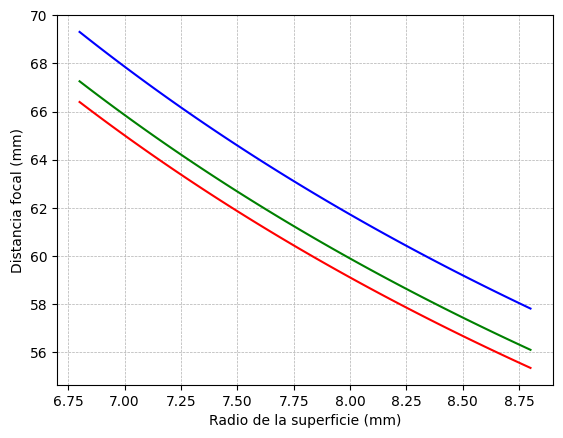

In [110]:
plt.figure()
plt.plot(R1,1000/fo_400,'b-',R1,1000/fo_550,'g-',R1,1000/fo_700,'r-')
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
#plt.title("Distancia focal efectiva objeto vs primera superficie de la córnea")
plt.xlabel("Radio de la superficie (mm)")
plt.ylabel("Distancia focal (mm)")
plt.savefig(os.path.join('PotenciaFocalGradienteObjeto.jpg'))
plt.show()

array([4.5 , 4.49, 4.48, 4.47, 4.46, 4.45, 4.44, 4.43, 4.42, 4.41, 4.4 ,
       4.39, 4.38, 4.37, 4.36, 4.35, 4.34, 4.33, 4.32, 4.31, 4.3 ])

array([0.        , 0.883437  , 0.62502203, 0.5106046 , 0.44243621,
       0.3959417 , 0.36164004, 0.33499574, 0.31353048, 0.29576055,
       0.28073628, 0.26781785, 0.2565564 , 0.24662648, 0.23778561,
       0.22984891, 0.22267264, 0.21614315, 0.21016919, 0.20467659,
       0.19960432])

In [5]:
Z

array([0.        , 0.883437  , 1.50845904, 2.01906363, 2.46149984,
       2.85744154, 3.21908158, 3.55407732, 3.86760779, 4.16336835,
       4.44410462, 4.71192247, 4.96847887, 5.21510535, 5.45289096,
       5.68273986, 5.9054125 , 6.12155565, 6.33172484, 6.53640142,
       6.73600574])

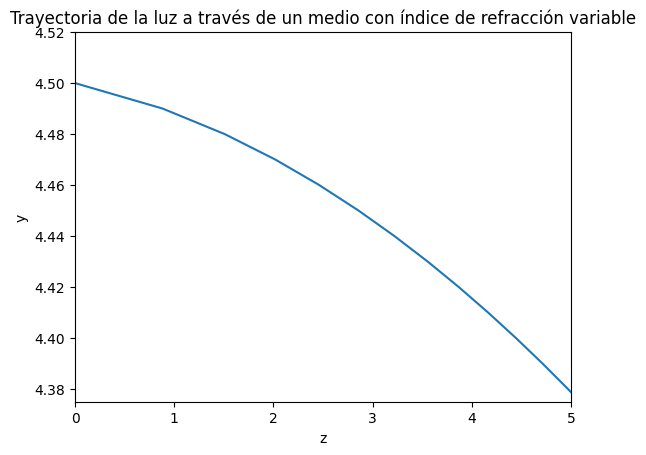

### Grafico de OSLO

In [27]:
import pandas as pd
import numpy as np
import os

datos = np.loadtxt("oslo_datos.txt")

In [28]:
datos

array([[ 6.75    , -2.311695, -1.907307, -1.768229],
       [ 7.      , -1.878207, -1.453389, -1.307777],
       [ 7.25    , -1.452791, -1.007642, -0.855552],
       [ 7.5     , -1.035223, -0.569848, -0.411336],
       [ 7.75    , -0.625289, -0.139795,  0.025082],
       [ 7.8     , -0.544199, -0.054696,  0.111448],
       [ 8.      , -0.22278 ,  0.28272 ,  0.453905],
       [ 8.25    ,  0.172503,  0.697893,  0.875331],
       [ 8.5     ,  0.560753,  1.105915,  1.28949 ],
       [ 8.75    ,  0.942157,  1.506969,  1.696742]])

In [29]:
R1 = datos[:,0]
i_400 = datos[:,1]
i_550 = datos[:,2]
i_700 = datos[:,3]

In [30]:
R1

array([6.75, 7.  , 7.25, 7.5 , 7.75, 7.8 , 8.  , 8.25, 8.5 , 8.75])

In [31]:
i_400

array([-2.311695, -1.878207, -1.452791, -1.035223, -0.625289, -0.544199,
       -0.22278 ,  0.172503,  0.560753,  0.942157])

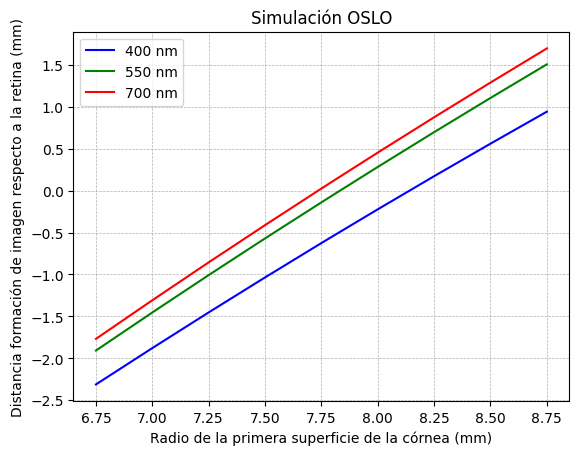

In [32]:
plt.figure()
plt.plot(R1,i_400,'b-',label='400 nm')
plt.plot(R1,i_550,'g-',label='550 nm')
plt.plot(R1,i_700,'r-',label='700 nm')
plt.legend()
plt.grid(True, which='both', linewidth=0.5, linestyle='--')
plt.title("Simulación OSLO")
plt.xlabel("Radio de la primera superficie de la córnea (mm)")
plt.ylabel("Distancia formación de imagen respecto a la retina (mm)")
plt.savefig(os.path.join('DistanciaImagen2.jpg'))
plt.show()